<a href="https://colab.research.google.com/github/saurabhashok/covid_detection_tensorflow/blob/main/covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

Cloning repository with X-ray images & Data Exploration 

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 37.34 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"
#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')
#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')


#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])


test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])


['COVID19(466).jpg', 'COVID19(497).jpg', 'COVID19(5).jpg', 'COVID19(151).jpg', 'COVID19(272).jpg', 'COVID19(322).jpg', 'COVID19(305).jpg', 'COVID19(45).jpg', 'COVID19(312).jpg', 'COVID19(77).jpg']
['NORMAL(854).jpg', 'NORMAL(438).jpg', 'NORMAL(1058).jpg', 'NORMAL(407).jpg', 'NORMAL(1112).jpg', 'NORMAL(931).jpg', 'NORMAL(167).jpg', 'NORMAL(144).jpg', 'NORMAL(478).jpg', 'NORMAL(456).jpg']
['COVID19(63).jpg', 'COVID19(396).jpg', 'COVID19(315).jpg', 'COVID-19 (718).jpg', 'COVID19(186).jpg', 'COVID19(561).jpg', 'COVID19(278).jpg', 'COVID-19 (609).jpg', 'COVID19(358).jpg', 'COVID-19 (570).jpg']
['NORMAL(1532).jpg', 'NORMAL(1333).jpg', 'NORMAL(1245).jpg', 'NORMAL(654).jpg', 'NORMAL(565).jpg', 'NORMAL(219).jpg', 'NORMAL(1415).jpg', 'NORMAL(49).jpg', 'NORMAL(1271).jpg', 'NORMAL(509).jpg']


In [ ]:
#print the total no of images present in each dir
print("Total number of images in training set is ",len(train_covid_names+train_normal_names))
print("Total number of images in testing set is ",len(test_normal_names+test_covid_names))

Total number of images in training set is  1811
Total number of images in testing set is  484


Data Visualization of the image samples in the data repository

['/content/datasets/Data/train/COVID19/COVID19(466).jpg', '/content/datasets/Data/train/COVID19/COVID19(497).jpg', '/content/datasets/Data/train/COVID19/COVID19(5).jpg', '/content/datasets/Data/train/COVID19/COVID19(151).jpg', '/content/datasets/Data/train/COVID19/COVID19(272).jpg', '/content/datasets/Data/train/COVID19/COVID19(322).jpg', '/content/datasets/Data/train/COVID19/COVID19(305).jpg', '/content/datasets/Data/train/COVID19/COVID19(45).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(854).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(438).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1058).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(407).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1112).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(931).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(167).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(144).jpg']


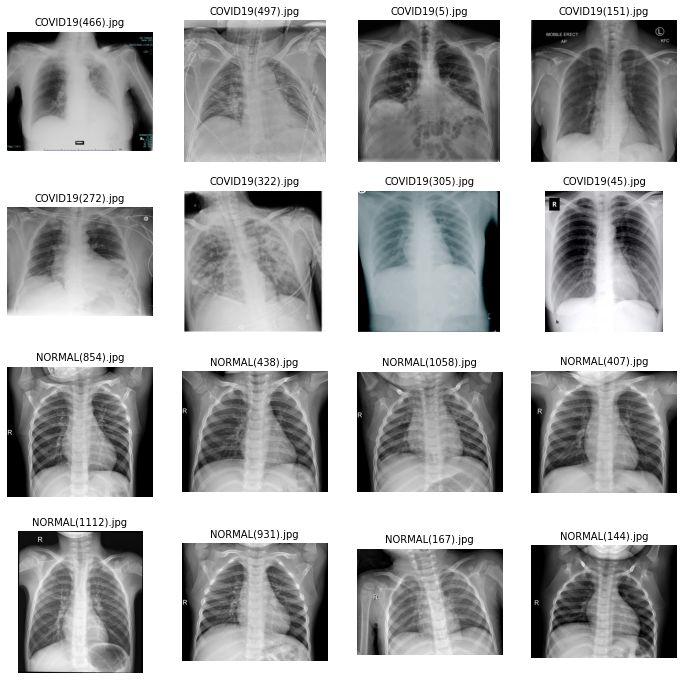

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4 
cols = 4 
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir, filename) for  filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename)for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i, img_path in enumerate(merged_list):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(rows, cols, i+1)
  sp.axis('Off')
  img =  mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150,150),
                                                    subset = 'training',
                                                    batch_size=32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150,150),
                                                    subset = 'validation',
                                                    batch_size=32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode = 'binary')



Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#display the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#display the image shape
train_generator.image_shape

NameError: ignored

Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32, (5,5),padding='SAME', activation='relu', input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer to skip 50 percent of the nodes
model.add(Dropout(0.5))
]# add another convolutional layer
model.add(Conv2D(64, (5,5),padding='SAME', activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer to skip 50 percent of the nodes
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer to skip 50 percent of the nodes
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

 Model Compilation & model training

In [ ]:
#compile the model
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 77s 988ms/step - loss: 52.4646 - accuracy: 0.6044 - val_loss: 0.5788 - val_accuracy: 0.6989
Epoch 2/30
46/46 [==============================] - 45s 978ms/step - loss: 0.4770 - accuracy: 0.7198 - val_loss: 0.6565 - val_accuracy: 0.5746
Epoch 3/30
46/46 [==============================] - 45s 977ms/step - loss: 0.4564 - accuracy: 0.7812 - val_loss: 0.4732 - val_accuracy: 0.7210
Epoch 4/30
46/46 [==============================] - 45s 974ms/step - loss: 0.5559 - accuracy: 0.7734 - val_loss: 0.5079 - val_accuracy: 0.7210
Epoch 5/30
46/46 [==============================] - 45s 975ms/step - loss: 0.4441 - accuracy: 0.7948 - val_loss: 0.5504 - val_accuracy: 0.7155
Epoch 6/30
46/46 [==============================] - 45s 972ms/step - loss: 0.4264 - accuracy: 0.8001 - val_loss: 0.4402 - val_accuracy: 0.7486
Epoch 7/30
46/46 [==============================] - 45s 970ms/step - loss: 0.4207 - accuracy: 0.8036 - val_loss: 0.4176 - val_accuracy: 0.768

Model Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

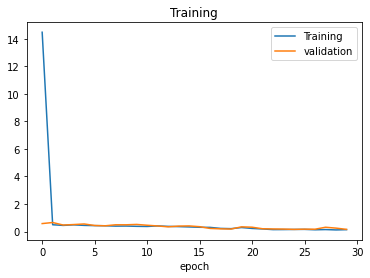

In [ ]:
#plot for graph between training and validation loss performance 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'validation'])
plt.title('Training')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

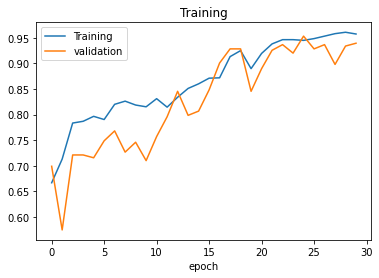

In [ ]:
#plot for graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'validation'])
plt.title('Training')
plt.xlabel('epoch')

In [ ]:
# test accuarcy and loss stats
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{}, test_acc:{}'.format(test_loss, test_acc))

16/16 [==============================] - 10s 617ms/step - loss: 0.1708 - accuracy: 0.9360
test loss:0.17082639038562775, test_acc:0.9359503984451294


Prediction On New Data sample

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = image.load_img(img_path, target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction==0:
    print("covid detected")
  else:
    print("Your report is normal")
